In [2]:
import nltk
import re
nltk.download('stopwords')

def pre_processamento(texto):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/caiocoutinho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import yake

def extract_top_keywords(text, language="pt-br", max_ngram_size=2, deduplication_threshold=0.1, deduplication_algo='seqm', window_size=1, num_of_keywords=6):
    if not isinstance(text, str):
        raise ValueError("Input must be a string")

    try:
        custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, dedupFunc=deduplication_algo, windowsSize=window_size, top=num_of_keywords, features=None)
    except ModuleNotFoundError:
        raise ModuleNotFoundError("YAKE library not installed")

    keywords = custom_kw_extractor.extract_keywords(text)

    top_keywords = [kw[0] for kw in keywords]

    return top_keywords

In [4]:
input_text = "O Índice Nacional de Preços ao Consumidor Amplo (IPCA), considerado a inflação oficial do país, mostra que os preços subiram 0,46% em maio, segundo dados divulgados nesta terça-feira (11) pelo Instituto Brasileiro de Geografia e Estatística (IBGE). A alta nos preços foi puxada, sobretudo, por um avanço no grupo de Alimentação e bebidas, que subiu 0,62% na comparação com abril. Dentro do grupo, destaque para os tubérculos, raízes e legumes, principalmente a batata, que disparou 20,61% em um mês. Segundo o IBGE, as maiores cheias da história que foram registradas no Rio Grande do Sul no mês passado já começam a mostrar seus impactos na economia brasileira, contribuindo para o avanço da inflação. O peso da capital Porto Alegre na inflação brasileira é de 8,61%, segundo André Almeida, gerente da pesquisa, atrás apenas de São Paulo, Rio de Janeiro e Belo Horizonte."

top_keywords = extract_top_keywords(input_text)

print(top_keywords)

['Consumidor Amplo', 'Índice Nacional', 'IBGE', 'país']


In [5]:
from requests_html import HTMLSession

def extract_text(url):
    s = HTMLSession()
    response = s.get(url)
    # Encontra todos os elementos <p> e extrai o texto de cada um
    paragrafos = response.html.find('p')
    # Obtém o texto de cada parágrafo e remove os que estiverem vazios
    paragrafos_texto = [p.text for p in paragrafos if p.text.strip()]
    return paragrafos_texto


In [14]:
url = 'https://pt.wikipedia.org/wiki/Livro'
texto_livros = extract_text(url)
paragrafos_array = list(texto_livros)

# Imprime cada parágrafo
for i, texto_livro in enumerate(texto_livros):
    print(f"Parágrafo {i+1}:\n{texto_livro}\n")

Parágrafo 1:
Livro (do latim liber, libri[1]) é um objeto transportável, composto por páginas encadernadas, contendo texto manuscrito ou impresso e/ou imagens e que forma uma publicação unitária (ou foi concebido como tal) ou a parte principal de um trabalho literário, científico ou outro, formando um volume.

Parágrafo 2:
Em ciência da informação, o livro é chamado monografia, para distingui-lo de outros tipos de publicações como revistas, periódicos, teses, tesauros, artigos etc.

Parágrafo 3:
O livro é um produto intelectual e, como tal, encerra conhecimento e expressões individuais ou coletivas. Mas também é nos dias de hoje um produto de consumo, um bem. Portanto, a parte final de sua produção é realizada por meios industriais (impressão e distribuição), envolvendo também o design de livros. A tarefa de criar um conteúdo passível de ser transformado em livro é tarefa do autor. Já a produção dos livros, no que concerne a transformar os originais num produto comercializável, é taref

In [12]:
for i, paragrafo_array in enumerate(paragrafos_array):
    top_keywords = extract_top_keywords(paragrafo_array)
    print(f"Parágrafo {i+1}:")
    print(top_keywords)

Parágrafo 1:
['latim liber', 'objeto transportável', 'páginas', 'concebido']
Parágrafo 2:
['artigos etc', 'periódicos', 'informação']
Parágrafo 3:
['encerra conhecimento', 'livros', 'tarefa', 'função']
Parágrafo 4:
['inovações técnicas', 'livro']
Parágrafo 5:
['escrita surgiu', 'antiguidade', 'texto', 'noções']
Parágrafo 6:
['escrita cuneiforme', 'traduções ocidentais']
Parágrafo 7:
['facilmente transportável', 'veio']
Parágrafo 8:
['daí surge', 'liber libri', 'planta']
Parágrafo 9:
['couro bovino', 'excerto', 'animais']
Parágrafo 10:
['identificando definitivamente', 'livro']
Parágrafo 11:
['códex acontece', 'Roma', 'tenha surgido']
Parágrafo 12:
['religião cristã']
Parágrafo 13:
['Idade Média', 'livro sofre', 'salvação', 'Antiguidade', 'homens']
Parágrafo 14:
['livro continua', 'textos', 'maiúsculas']
Parágrafo 15:
['Idade Média', 'século XIV', 'importante', 'blocos eram', 'gravação']
Parágrafo 16:
['Johannes Gutenberg', 'livro impresso', 'Bíblia']
Parágrafo 17:
['imprensa desenvolve

In [19]:
%matplotlib inline

from wordcloud import WordCloud

texto_completo = ' '.join([texto for texto in paragrafos_array])

texto_completo = pre_processamento(texto_completo)

nuvem_palavras = WordCloud(width= 800, height= 500,
                           max_font_size=110).generate(texto_completo)

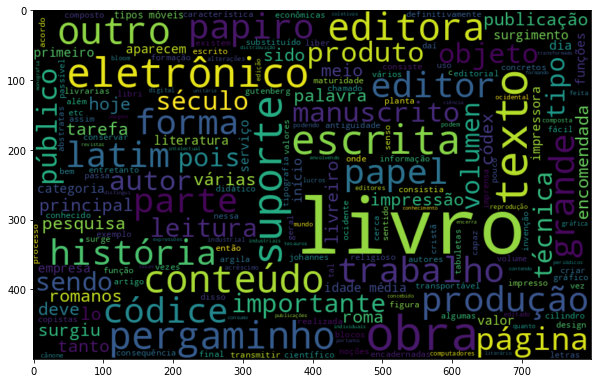

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()